## Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_profiling
import pickle
import warnings                                
warnings.filterwarnings('ignore')

In [2]:
# #All instances df

# import glob
# path ='/home/cv/workspace2/ESDS_Project/ML_project_1/group82_resource_utilization/*' 
# #base_dir = '.'
# base_dir = '/home/cv/workspace2/ESDS_Project/ML_project_1/group82_resource_utilization'
# folders = glob.glob(path)
# count = 0
# concatenated_df = pd.DataFrame()
# for i in folders:
#     sub_path = i+"/mem.log"
#     header_list = ["CombinedTime", "Value"]
#     df_from_each_file = pd.read_csv(sub_path,sep=':',names = header_list, infer_datetime_format = True)
#     if count==0:
#         concatenated_df=df_from_each_file
#     else:
        
#         concatenated_df   = pd.concat([concatenated_df,df_from_each_file])
#     count += 1
#     print(count)
#     #print(sub_path)
# print(concatenated_df.head())

In [3]:
#  #Groupwise df
# import glob
# path ='/home/cv/workspace2/ESDS_Project/ML_project_1/group82_resource_utilization/group_4*' 

# folders = glob.glob(path)
# #folders = ('A', 'B', 'D', 'F')
# #print(folders)
# count = 0
# concatenated_df = pd.DataFrame()
# for i in folders:
#     sub_path = i+"/mem.log"
#     header_list = ["CombinedTime", "Value"]
#     df_from_each_file = pd.read_csv(sub_path,sep=':',names = header_list, infer_datetime_format = True)
#     #print(df_from_each_file.head())
#     if count==0:
#         concatenated_df=df_from_each_file
#         #concatenated_df.append(df_from_1st_file)
#     else:
#         #concatenated_df.append(df_from_each_file)
#         concatenated_df   = pd.concat([concatenated_df,df_from_each_file])
#     count += 1
#     print(count)
#     #print(sub_path)
# print(concatenated_df.head())
# # pattern = '{}/{}/mem.log'.format(base_dir, ''.join(folders))
# # print(pattern)
# #for filename in glob.glob(pattern):
# #print(filename)

In [4]:
url = "/home/cv/workspace2/ESDS_Project/ML_project_1/group82_resource_utilization/group_1_011a0887-5900-40cc-9639-363b4e232a19/mem.log"
header_list = ["CombinedTime", "Value"]
df = pd.read_csv(url,sep=':',names = header_list, infer_datetime_format = True)

In [5]:
df.head()

,CombinedTime,Value
0,Fri Feb 15 11:04:41 IST 2019,30824:28382:5:2.57:0.00:530G
1,Fri Feb 15 11:16:40 IST 2019,30824:28381:5:3.24:0.00:530G
2,Fri Feb 15 11:28:33 IST 2019,30824:28424:5:2.69:0.00:530G
3,Fri Feb 15 11:40:35 IST 2019,30824:28520:5:3.26:0.00:530G
4,Fri Feb 15 11:52:35 IST 2019,30824:28331:5:2.72:0.00:530G


In [6]:
df[['Day','Month','Date','Time','TimeZone','Year']] = df.CombinedTime.str.split(" ",expand=True) 

In [7]:
df.head()

,CombinedTime,Value,Day,Month,Date,Time,TimeZone,Year
0,Fri Feb 15 11:04:41 IST 2019,30824:28382:5:2.57:0.00:530G,Fri,Feb,15,11:04:41,IST,2019
1,Fri Feb 15 11:16:40 IST 2019,30824:28381:5:3.24:0.00:530G,Fri,Feb,15,11:16:40,IST,2019
2,Fri Feb 15 11:28:33 IST 2019,30824:28424:5:2.69:0.00:530G,Fri,Feb,15,11:28:33,IST,2019
3,Fri Feb 15 11:40:35 IST 2019,30824:28520:5:3.26:0.00:530G,Fri,Feb,15,11:40:35,IST,2019
4,Fri Feb 15 11:52:35 IST 2019,30824:28331:5:2.72:0.00:530G,Fri,Feb,15,11:52:35,IST,2019


In [8]:
df[['Memory Allocated','Memory Used','CPU Allocated','CPU Used','Network bandwidth utilization','Storage space utilization']] = df.Value.str.split(":",expand=True) 

In [9]:
df.head()

,CombinedTime,Value,Day,Month,Date,Time,TimeZone,Year,Memory Allocated,Memory Used,CPU Allocated,CPU Used,Network bandwidth utilization,Storage space utilization
0,Fri Feb 15 11:04:41 IST 2019,30824:28382:5:2.57:0.00:530G,Fri,Feb,15,11:04:41,IST,2019,30824,28382,5,2.57,0.00,530G
1,Fri Feb 15 11:16:40 IST 2019,30824:28381:5:3.24:0.00:530G,Fri,Feb,15,11:16:40,IST,2019,30824,28381,5,3.24,0.00,530G
2,Fri Feb 15 11:28:33 IST 2019,30824:28424:5:2.69:0.00:530G,Fri,Feb,15,11:28:33,IST,2019,30824,28424,5,2.69,0.00,530G
3,Fri Feb 15 11:40:35 IST 2019,30824:28520:5:3.26:0.00:530G,Fri,Feb,15,11:40:35,IST,2019,30824,28520,5,3.26,0.00,530G
4,Fri Feb 15 11:52:35 IST 2019,30824:28331:5:2.72:0.00:530G,Fri,Feb,15,11:52:35,IST,2019,30824,28331,5,2.72,0.00,530G


In [10]:
df.profile_report()

## Pre-Processing the Dataset

In [12]:
df.drop(["CombinedTime", "Value", "Network bandwidth utilization","TimeZone","Storage space utilization",], axis = 1, inplace = True)

In [13]:
df.head()

,Day,Month,Date,Time,Year,Memory Allocated,Memory Used,CPU Allocated,CPU Used
0,Fri,Feb,15,11:04:41,2019,30824,28382,5,2.57
1,Fri,Feb,15,11:16:40,2019,30824,28381,5,3.24
2,Fri,Feb,15,11:28:33,2019,30824,28424,5,2.69
3,Fri,Feb,15,11:40:35,2019,30824,28520,5,3.26
4,Fri,Feb,15,11:52:35,2019,30824,28331,5,2.72


In [14]:
print(df['Memory Used'].isnull().sum())
print(df['Memory Allocated'].isnull().sum())
print(df['CPU Used'].isnull().sum())
print(df['CPU Allocated'].isnull().sum())

0
0
0
0


In [15]:
df['Memory Usage'] = (df['Memory Used'].astype(float)/ df['Memory Allocated'].astype(float)).fillna(0)
df['CPU Usage'] = (df['CPU Used'].astype(float) / df['CPU Allocated'].astype(float)).fillna(0)
df['Time'].fillna( method ='ffill', limit = 1, inplace = True) 

In [16]:
print(df['Time'].isnull().sum())
print(df['Memory Usage'].isnull().sum())
print(df['CPU Usage'].isnull().sum())

0
0
0


In [17]:
df.head()

,Day,Month,Date,Time,Year,Memory Allocated,Memory Used,CPU Allocated,CPU Used,Memory Usage,CPU Usage
0,Fri,Feb,15,11:04:41,2019,30824,28382,5,2.57,0.920776,0.514
1,Fri,Feb,15,11:16:40,2019,30824,28381,5,3.24,0.920744,0.648
2,Fri,Feb,15,11:28:33,2019,30824,28424,5,2.69,0.922139,0.538
3,Fri,Feb,15,11:40:35,2019,30824,28520,5,3.26,0.925253,0.652
4,Fri,Feb,15,11:52:35,2019,30824,28331,5,2.72,0.919121,0.544


In [18]:
look_up = {'Jan':'01','Feb':'02','Mar':'03','Apr':'04','May':'05','Jun':'06','Jul':'07','Aug':'08','Sep':'09','Oct':'10','Nov':'09','Dec':'12'}

df['Month'] = df['Month'].apply(lambda x: look_up[x])

In [19]:
df.head()

,Day,Month,Date,Time,Year,Memory Allocated,Memory Used,CPU Allocated,CPU Used,Memory Usage,CPU Usage
0,Fri,02,15,11:04:41,2019,30824,28382,5,2.57,0.920776,0.514
1,Fri,02,15,11:16:40,2019,30824,28381,5,3.24,0.920744,0.648
2,Fri,02,15,11:28:33,2019,30824,28424,5,2.69,0.922139,0.538
3,Fri,02,15,11:40:35,2019,30824,28520,5,3.26,0.925253,0.652
4,Fri,02,15,11:52:35,2019,30824,28331,5,2.72,0.919121,0.544


In [20]:
df["dates"] = df["Year"]+ df["Month"]+ df["Date"]+ ' ' +df['Time']

In [21]:
df.head()

,Day,Month,Date,Time,Year,Memory Allocated,Memory Used,CPU Allocated,CPU Used,Memory Usage,CPU Usage,dates
0,Fri,02,15,11:04:41,2019,30824,28382,5,2.57,0.920776,0.514,20190215 11:04:41
1,Fri,02,15,11:16:40,2019,30824,28381,5,3.24,0.920744,0.648,20190215 11:16:40
2,Fri,02,15,11:28:33,2019,30824,28424,5,2.69,0.922139,0.538,20190215 11:28:33
3,Fri,02,15,11:40:35,2019,30824,28520,5,3.26,0.925253,0.652,20190215 11:40:35
4,Fri,02,15,11:52:35,2019,30824,28331,5,2.72,0.919121,0.544,20190215 11:52:35


In [22]:
df["dates"] = df["dates"].apply(pd.to_datetime, format='%Y%m%d %H:%M:%S')
#format='%Y%m%d'

In [23]:
df.head()

,Day,Month,Date,Time,Year,Memory Allocated,Memory Used,CPU Allocated,CPU Used,Memory Usage,CPU Usage,dates
0,Fri,02,15,11:04:41,2019,30824,28382,5,2.57,0.920776,0.514,2019-02-15 11:04:41
1,Fri,02,15,11:16:40,2019,30824,28381,5,3.24,0.920744,0.648,2019-02-15 11:16:40
2,Fri,02,15,11:28:33,2019,30824,28424,5,2.69,0.922139,0.538,2019-02-15 11:28:33
3,Fri,02,15,11:40:35,2019,30824,28520,5,3.26,0.925253,0.652,2019-02-15 11:40:35
4,Fri,02,15,11:52:35,2019,30824,28331,5,2.72,0.919121,0.544,2019-02-15 11:52:35


In [24]:
#df["Time"] = pd.to_timedelta(df["Time"])

In [25]:
df.drop(["Month","Date","Year"], axis = 1, inplace = True)

In [26]:
df.drop(["Memory Allocated","Memory Used","CPU Allocated","CPU Used"],axis = 1, inplace = True)
df.head()

,Day,Time,Memory Usage,CPU Usage,dates
0,Fri,11:04:41,0.920776,0.514,2019-02-15 11:04:41
1,Fri,11:16:40,0.920744,0.648,2019-02-15 11:16:40
2,Fri,11:28:33,0.922139,0.538,2019-02-15 11:28:33
3,Fri,11:40:35,0.925253,0.652,2019-02-15 11:40:35
4,Fri,11:52:35,0.919121,0.544,2019-02-15 11:52:35


In [27]:
df = df.set_index('dates')
df.head()

,Day,Time,Memory Usage,CPU Usage
dates,,,,
2019-02-15 11:04:41,Fri,11:04:41,0.920776,0.514
2019-02-15 11:16:40,Fri,11:16:40,0.920744,0.648
2019-02-15 11:28:33,Fri,11:28:33,0.922139,0.538
2019-02-15 11:40:35,Fri,11:40:35,0.925253,0.652
2019-02-15 11:52:35,Fri,11:52:35,0.919121,0.544


### Exploratory Data Analysis(EDA)

In [28]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)

In [29]:
profile.to_file("report.html")

### Graphs to correlate and get idea about CPU and Memory Usage

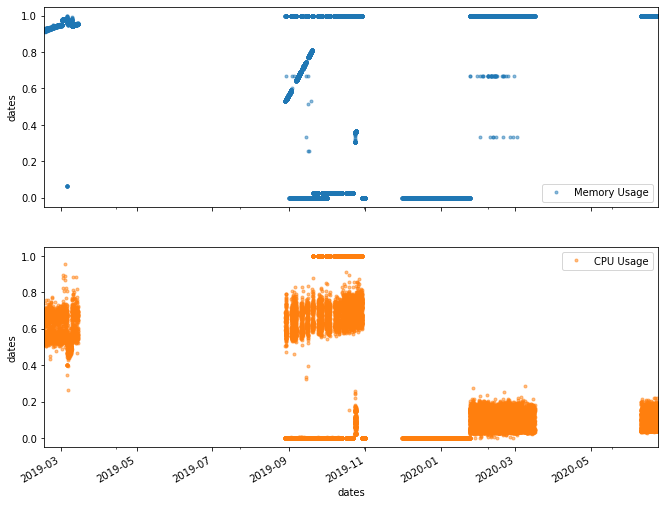

In [30]:
cols_plot = ['Memory Usage', 'CPU Usage']
axes = df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('dates')

Text(0, 0.5, 'CPU Usage')

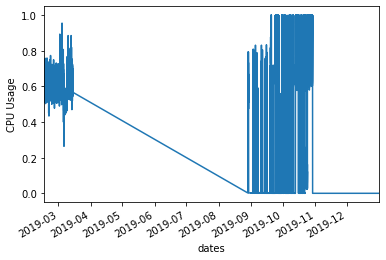

In [31]:
ax = df.loc['2019', 'CPU Usage'].plot()
ax.set_xlabel('dates')
ax.set_ylabel('CPU Usage')

Text(0, 0.5, 'CPU Usage')

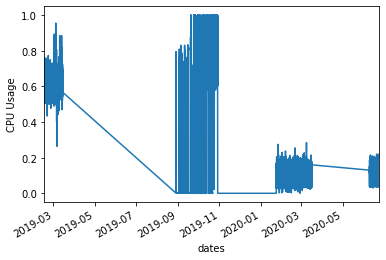

In [32]:
ax = df.loc['2019':'2020', 'CPU Usage'].plot()
ax.set_xlabel('dates')
ax.set_ylabel('CPU Usage')

In [33]:
#Weekday Usage detector

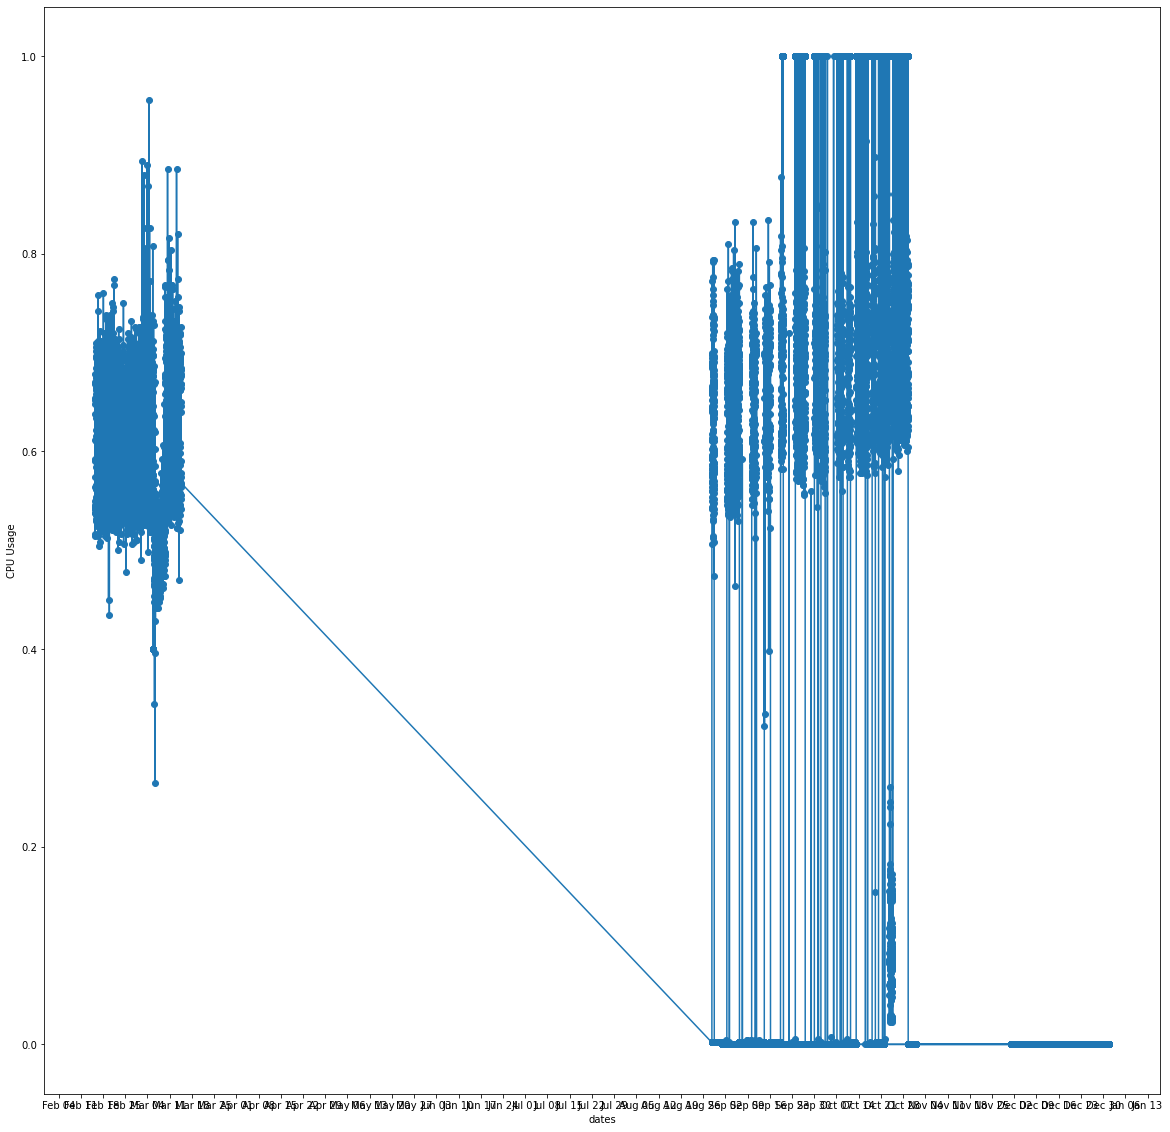

In [34]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(20, 20))
ax.plot(df.loc['2019', 'CPU Usage'], marker='o', linestyle='-')
ax.set_xlabel('dates')
ax.set_ylabel('CPU Usage')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

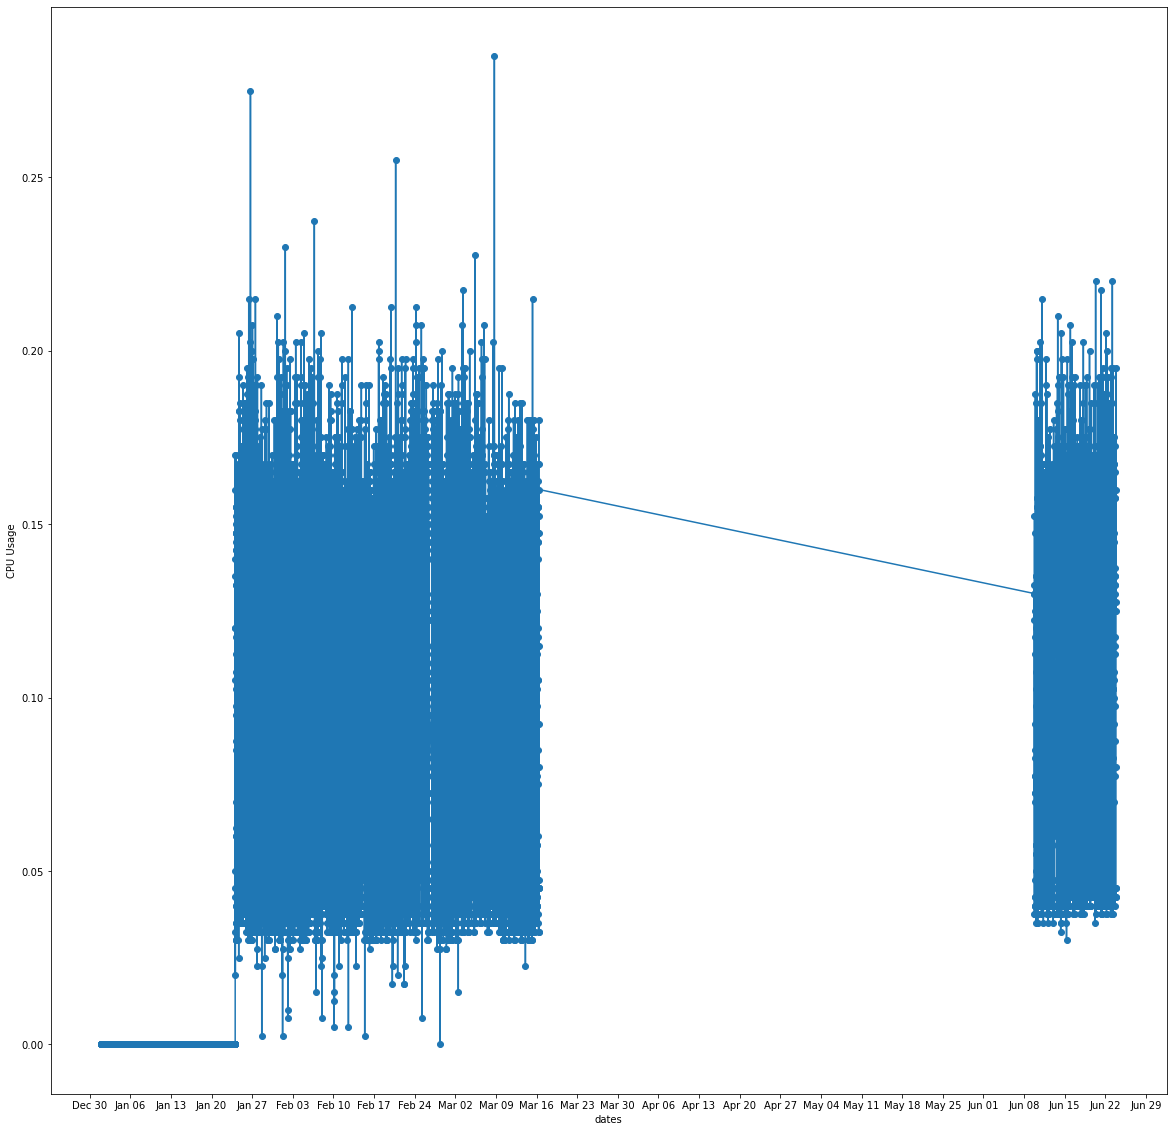

In [35]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(20, 20))
ax.plot(df.loc['2020', 'CPU Usage'], marker='o', linestyle='-')
ax.set_xlabel('dates')
ax.set_ylabel('CPU Usage')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

### By the above graphs, we can know that the data is skewed towards some particular season since the usage is high only during some continuous perios of time.

In [36]:
df.head()

,Day,Time,Memory Usage,CPU Usage
dates,,,,
2019-02-15 11:04:41,Fri,11:04:41,0.920776,0.514
2019-02-15 11:16:40,Fri,11:16:40,0.920744,0.648
2019-02-15 11:28:33,Fri,11:28:33,0.922139,0.538
2019-02-15 11:40:35,Fri,11:40:35,0.925253,0.652
2019-02-15 11:52:35,Fri,11:52:35,0.919121,0.544


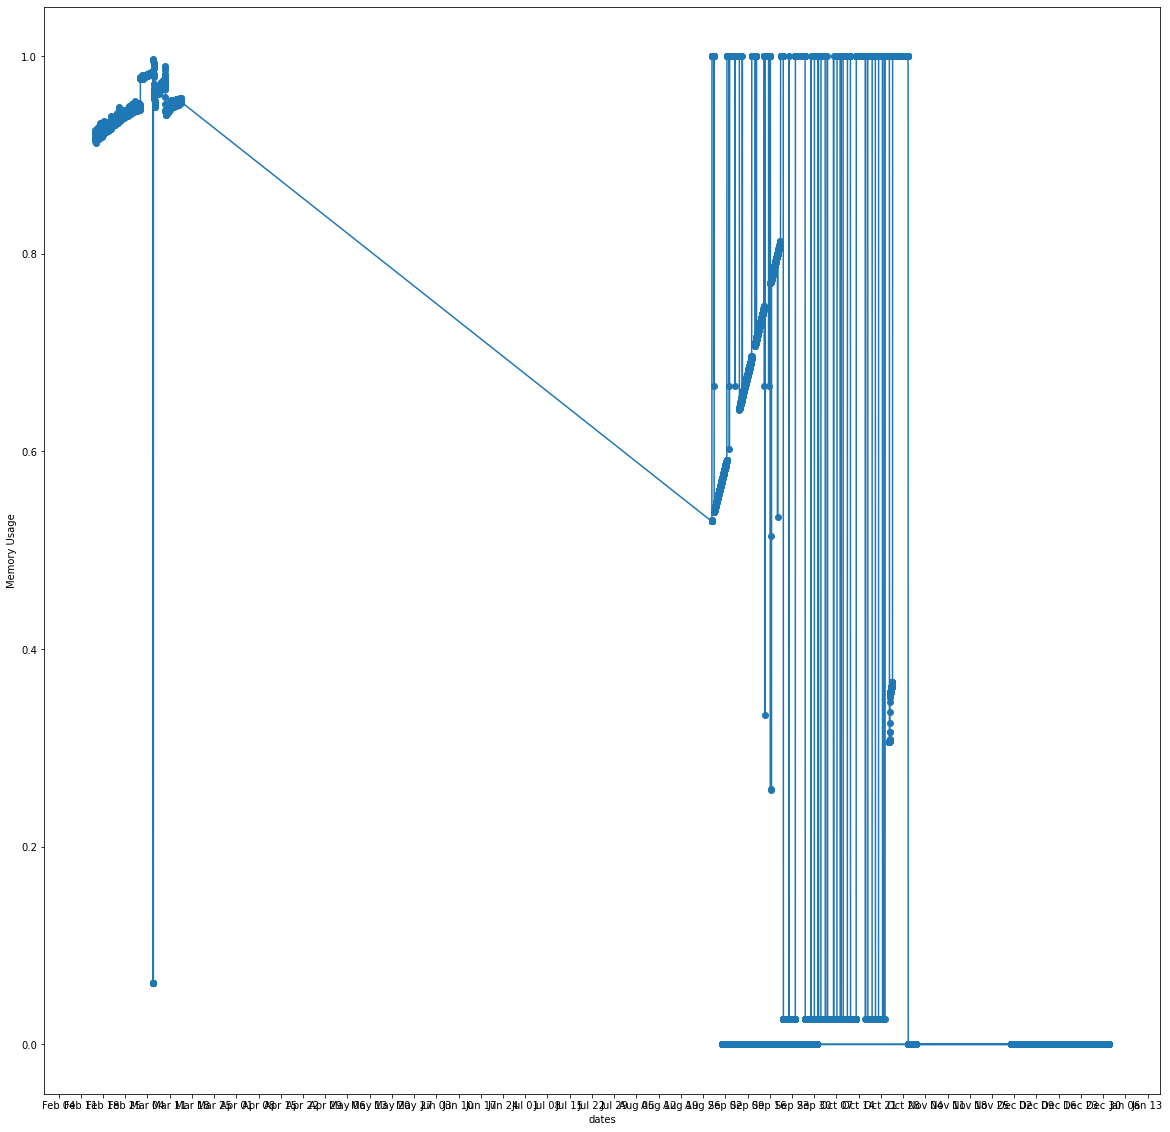

In [37]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(20, 20))
ax.plot(df.loc['2019', 'Memory Usage'], marker='o', linestyle='-')
ax.set_xlabel('dates')
ax.set_ylabel('Memory Usage')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

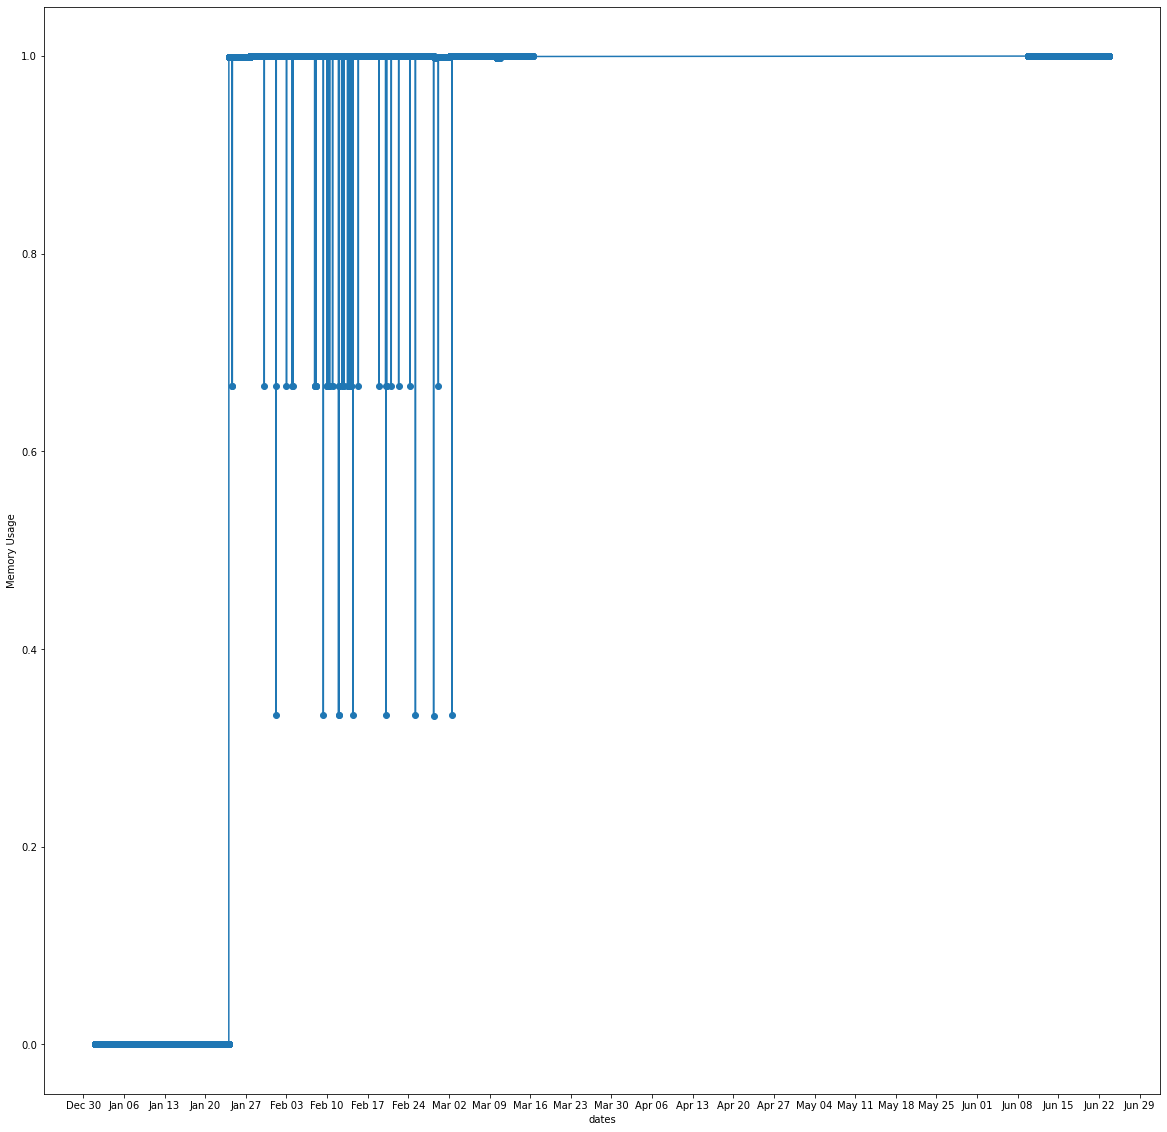

In [38]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(20, 20))
ax.plot(df.loc['2020', 'Memory Usage'], marker='o', linestyle='-')
ax.set_xlabel('dates')
ax.set_ylabel('Memory Usage')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

In [39]:
df.head()

,Day,Time,Memory Usage,CPU Usage
dates,,,,
2019-02-15 11:04:41,Fri,11:04:41,0.920776,0.514
2019-02-15 11:16:40,Fri,11:16:40,0.920744,0.648
2019-02-15 11:28:33,Fri,11:28:33,0.922139,0.538
2019-02-15 11:40:35,Fri,11:40:35,0.925253,0.652
2019-02-15 11:52:35,Fri,11:52:35,0.919121,0.544


In [40]:
df.drop(["Day","Time"], axis = 1, inplace = True)

In [41]:
df.head()

,Memory Usage,CPU Usage
dates,,
2019-02-15 11:04:41,0.920776,0.514
2019-02-15 11:16:40,0.920744,0.648
2019-02-15 11:28:33,0.922139,0.538
2019-02-15 11:40:35,0.925253,0.652
2019-02-15 11:52:35,0.919121,0.544


In [42]:
#Training and Testing Datasets
X_train = df.loc[:'2019']
y_train = df.loc[:'2019']
X_test = df.loc['2020']
y_test = df.loc['2020']

In [43]:
X_train

,Memory Usage,CPU Usage
dates,,
2019-02-15 11:04:41,0.920776,0.514
2019-02-15 11:16:40,0.920744,0.648
2019-02-15 11:28:33,0.922139,0.538
2019-02-15 11:40:35,0.925253,0.652
2019-02-15 11:52:35,0.919121,0.544
...,...,...
2019-12-31 23:33:36,0.000000,0.000
2019-12-31 23:39:45,0.000000,0.000
2019-12-31 23:45:54,0.000000,0.000


In [44]:
y_train

,Memory Usage,CPU Usage
dates,,
2019-02-15 11:04:41,0.920776,0.514
2019-02-15 11:16:40,0.920744,0.648
2019-02-15 11:28:33,0.922139,0.538
2019-02-15 11:40:35,0.925253,0.652
2019-02-15 11:52:35,0.919121,0.544
...,...,...
2019-12-31 23:33:36,0.000000,0.000
2019-12-31 23:39:45,0.000000,0.000
2019-12-31 23:45:54,0.000000,0.000


In [45]:
X_test

,Memory Usage,CPU Usage
dates,,
2020-01-01 00:04:25,0.000000,0.0000
2020-01-01 00:10:39,0.000000,0.0000
2020-01-01 00:16:52,0.000000,0.0000
2020-01-01 00:23:01,0.000000,0.0000
2020-01-01 00:29:12,0.000000,0.0000
...,...,...
2020-06-23 19:02:27,0.999772,0.0450
2020-06-23 19:12:27,0.999772,0.0800
2020-06-23 19:22:23,0.999772,0.1950


In [46]:
y_test

,Memory Usage,CPU Usage
dates,,
2020-01-01 00:04:25,0.000000,0.0000
2020-01-01 00:10:39,0.000000,0.0000
2020-01-01 00:16:52,0.000000,0.0000
2020-01-01 00:23:01,0.000000,0.0000
2020-01-01 00:29:12,0.000000,0.0000
...,...,...
2020-06-23 19:02:27,0.999772,0.0450
2020-06-23 19:12:27,0.999772,0.0800
2020-06-23 19:22:23,0.999772,0.1950


## Training

In [47]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn import neural_network
from sklearn import neighbors
from sklearn import ensemble
from sklearn import svm

LR: 0.500000 (0.500000)
NN: 0.499988 (0.499988)
KNN: 0.999361 (0.000639)
RF: 0.999302 (0.000698)
SVR: nan (nan)


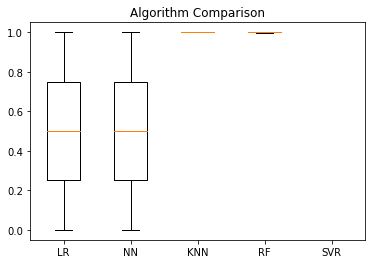

In [55]:
# Spot Check Algorithms
models = []
models.append(('LR', linear_model.LinearRegression()))
models.append(('NN', neural_network.MLPRegressor(solver = 'lbfgs')))  #neural network
models.append(('KNN', neighbors.KNeighborsRegressor())) 
models.append(('RF', ensemble.RandomForestRegressor(n_estimators = 10))) # Ensemble method - collection of many decision trees
models.append(('SVR', svm.SVR(gamma='auto'))) # kernel = linear
# Evaluate each model in turn
results = []
names = []
for name, model in models:
    # TimeSeries Cross validation
    tscv = TimeSeriesSplit(n_splits=2)
    
    cv_results = cross_val_score(model, X_train, y_train, cv=tscv, scoring='r2')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [61]:
from sklearn.metrics import make_scorer
def rmse(actual, predict):
    predict = np.array(predict)
    actual = np.array(actual)
    distance = predict - actual
    square_distance = distance ** 2
    mean_square_distance = square_distance.mean()
    score = np.sqrt(mean_square_distance)
    return score
rmse_score = make_scorer(rmse, greater_is_better = False)

In [62]:
#Grid Searching for RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
model = ensemble.RandomForestRegressor()
param_search = { 
    'n_estimators': [20, 50, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [i for i in range(5,15)]
}
tscv = TimeSeriesSplit(n_splits=10)
gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search, scoring = rmse_score)
gsearch.fit(X_train, y_train)
best_score = gsearch.best_score_
best_model = gsearch.best_estimator_

In [68]:
print(best_score)

-0.022587527042482358


In [69]:
print(best_model)

RandomForestRegressor(max_depth=11, max_features='log2', n_estimators=20)


## Evaluation

In [65]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):
# Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [66]:
y_true = y_test.values
y_pred = best_model.predict(X_test)
regression_results(y_true, y_pred)

explained_variance:  0.2177
mean_squared_log_error:  0.0073
r2:  -1.3182
MAE:  0.0829
MSE:  0.0119
RMSE:  0.1092


## Saving the best model

In [17]:
filename = 'finalized_single_instance_model.sav'
pickle.dump(best_model, open(filename, 'wb'))

NameError: name 'best_model' is not defined

In [67]:
y_pred

array([[0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       ...,
       [0.97655369, 0.32345   ],
       [0.91439574, 0.262625  ],
       [0.91439574, 0.262625  ]])

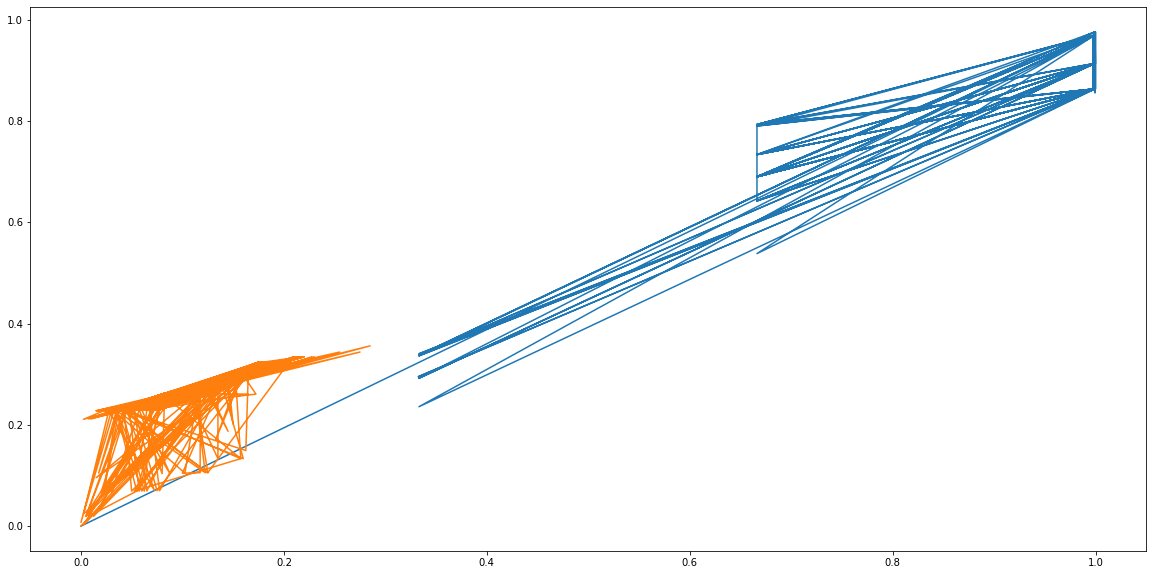

In [78]:
plt.figure(figsize=(20,10))
plt.plot(X_test,y_pred)
plt.show()

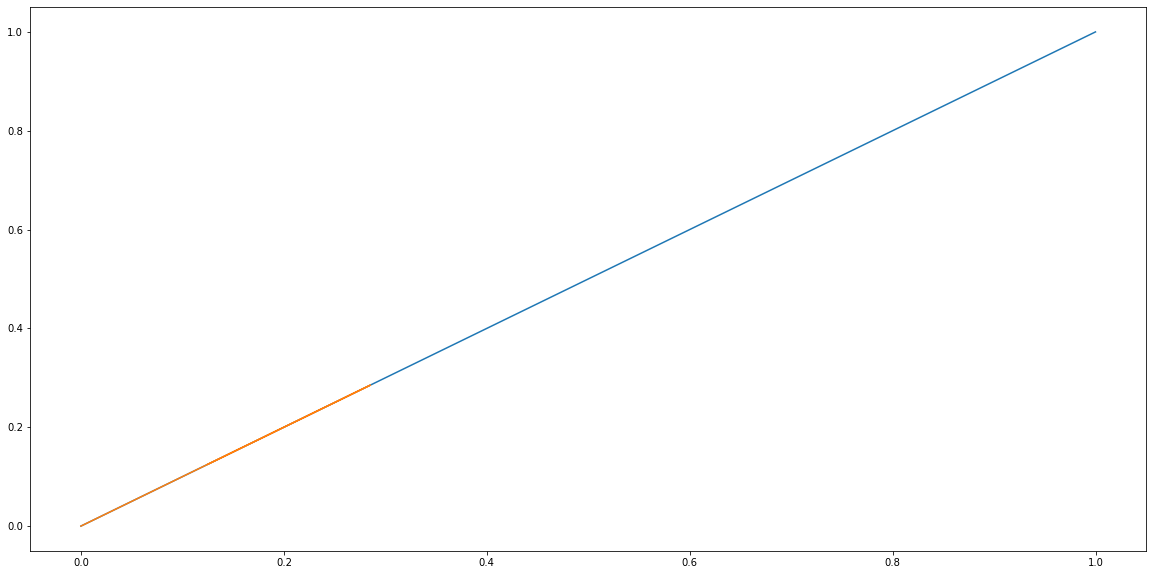

In [79]:
plt.figure(figsize=(20,10))
plt.plot(X_test,y_true)
plt.show()

In [81]:
ax = df.loc['2019', 'CPU Usage'].plot()
ax.set_xlabel('dates')
ax.set_ylabel('CPU Usage')

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

In [85]:
df

,Memory Usage,CPU Usage
dates,,
2019-02-15 11:04:41,0.920776,0.5140
2019-02-15 11:16:40,0.920744,0.6480
2019-02-15 11:28:33,0.922139,0.5380
2019-02-15 11:40:35,0.925253,0.6520
2019-02-15 11:52:35,0.919121,0.5440
...,...,...
2020-06-23 19:02:27,0.999772,0.0450
2020-06-23 19:12:27,0.999772,0.0800
2020-06-23 19:22:23,0.999772,0.1950


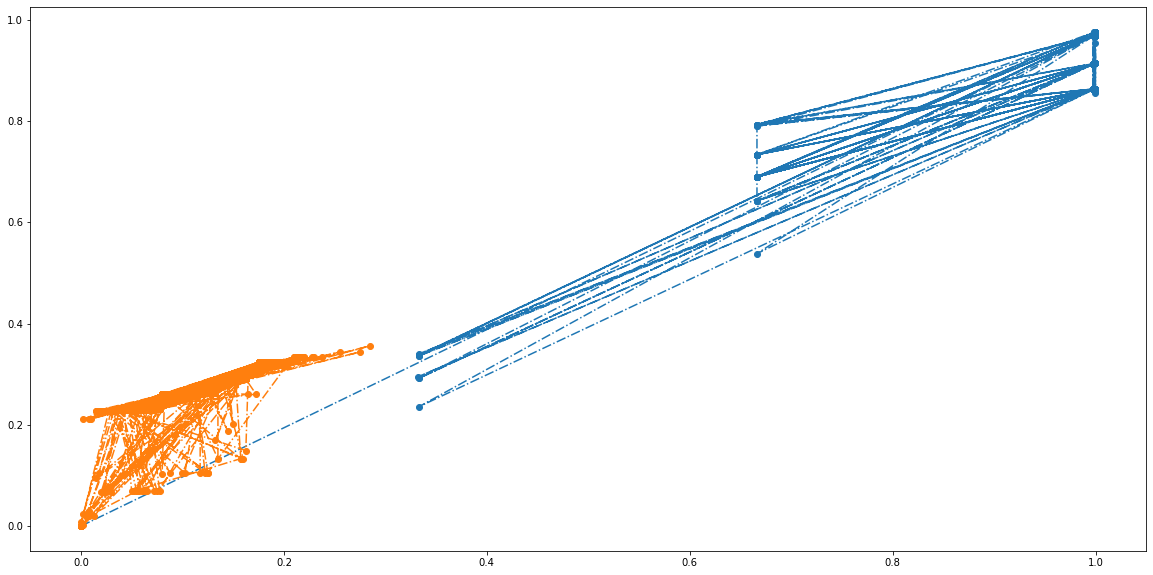

In [99]:
plt.figure(figsize=(20,10))
plt.plot(y_true,y_pred,marker='o',linestyle='-.')
plt.show()

In [86]:
y_pred

array([[0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       ...,
       [0.97655369, 0.32345   ],
       [0.91439574, 0.262625  ],
       [0.91439574, 0.262625  ]])

In [87]:
y_true

array([[0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       ...,
       [0.99977156, 0.195     ],
       [0.99977156, 0.1275    ],
       [0.99977156, 0.125     ]])